#
We run ROAD (faithfulness) from Quantus on RISE and a random baseline and get unexplainable bad results.

In [1]:
import warnings
warnings.filterwarnings('ignore') # disable warnings relateds to versions of tf
import numpy as np
import dianna
import quantus

In [2]:
quantus.helpers.constants.available_categories()

['Faithfulness',
 'Robustness',
 'Localisation',
 'Complexity',
 'Randomisation',
 'Axiomatic']

In [3]:
quantus.helpers.constants.available_metrics()

{'Faithfulness': ['Faithfulness Correlation',
  'Faithfulness Estimate',
  'Pixel-Flipping',
  'Region Segmentation',
  'Monotonicity-Arya',
  'Monotonicity-Nguyen',
  'Selectivity',
  'SensitivityN',
  'IROF',
  'ROAD',
  'Infidelity',
  'Sufficiency'],
 'Robustness': ['Continuity Test',
  'Local Lipschitz Estimate',
  'Max-Sensitivity',
  'Avg-Sensitivity',
  'Consistency',
  'Relative Input Stability',
  'Relative Output Stability',
  'Relative Representation Stability'],
 'Localisation': ['Pointing Game',
  'Top-K Intersection',
  'Relevance Mass Accuracy',
  'Relevance Rank Accuracy',
  'Attribution Localisation ',
  'AUC',
  'Focus'],
 'Complexity': ['Sparseness', 'Complexity', 'Effective Complexity'],
 'Randomisation': ['Model Parameter Randomisation', 'Random Logit'],
 'Axiomatic': ['Completeness', 'NonSensitivity', 'InputInvariance']}

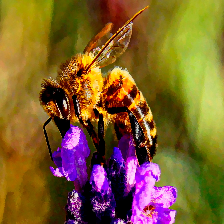

In [4]:
def load_img(path, target_size):
    from tensorflow.keras.preprocessing import image
    from tensorflow.keras.applications.resnet50 import preprocess_input
    img = image.load_img(path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

bee_img, bee_arr = load_img('C:/Users/ChristiaanMeijer/OneDrive - Netherlands eScience Center/Documents/dianna/dianna-exploration/example_data/xai_method_study/RISE/bee.jpg', (224,224,3))
bee_img

In [5]:
import matplotlib.pyplot as plt

def plot_hist(result):
    data = []
    for key, value in result.items():
        for _ in range(int(value)):
            data.append(key)

    # plot the histogram
    plt.hist(data, bins=range(0, 101, 10), align='mid')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Results')
    plt.show()

In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50()

def random_xai(model, input_data, method, labels, **kwargs):
    return np.random.randn(*input_data.shape)

random_result = quantus.FaithfulnessCorrelation(
    # nr_samples=5,
    # perturb_func=quantus.perturb_func.gaussian_noise,
)(model=model,
   x_batch=bee_arr,
   y_batch=[309],
   a_batch=np.random.randn(*(1,224,224)),
   explain_func= random_xai,
   explain_func_kwargs={'model_or_function': model,
                        "input_data": bee_arr[0],
                        "method": "RISE",
                        "labels": range(1),
                       }
)


Warnings and information:
 (1) The Faithfulness Correlation metric is likely to be sensitive to the choice of baseline value 'perturb_baseline', size of subset |S| 'subset_size' and the number of runs (for each input and explanation pair) 'nr_runs'.  
 (2) If attributions are normalised or their absolute values are taken it may destroy or skew information in the explanation and as a result, affect the overall evaluation outcome.
 (3) Make sure to validate the choices for hyperparameters of the metric (by calling .get_params of the metric instance).
 (4) For further information, see original publication: Bhatt, Umang, Adrian Weller, and José MF Moura. 'Evaluating and aggregating feature-based model explanations.' arXiv preprint arXiv:2005.00631 (2020).
 (5) To disable these warnings set 'disable_warnings' = True when initialising the metric.



In [8]:
random_result

[-0.10526589975110237]

In [22]:
# Average Sensitivity: RISE
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50()

result = quantus.FaithfulnessCorrelation(
    nr_runs=1000,

    # perturb_func=quantus.perturb_func.gaussian_noise,
)(model=model,
   x_batch=bee_arr,
   y_batch=[309],
   a_batch=None,
   explain_func=dianna.explain_image,
   explain_func_kwargs={'model_or_function': model,
                        "input_data": bee_arr[0],
                        "method": "RISE",
                        "labels": range(1),
                        "p_keep": 0.1,
                        "n_masks": 1000,
                       }
)
print(result)

Warnings and information:
 (1) The Faithfulness Correlation metric is likely to be sensitive to the choice of baseline value 'perturb_baseline', size of subset |S| 'subset_size' and the number of runs (for each input and explanation pair) 'nr_runs'.  
 (2) If attributions are normalised or their absolute values are taken it may destroy or skew information in the explanation and as a result, affect the overall evaluation outcome.
 (3) Make sure to validate the choices for hyperparameters of the metric (by calling .get_params of the metric instance).
 (4) For further information, see original publication: Bhatt, Umang, Adrian Weller, and José MF Moura. 'Evaluating and aggregating feature-based model explanations.' arXiv preprint arXiv:2005.00631 (2020).
 (5) To disable these warnings set 'disable_warnings' = True when initialising the metric.



Explaining: 100%|██████████| 10/10 [00:56<00:00,  5.62s/it]


[0.08319267603621364]


In [23]:
[0.11276582301323408][0.08319267603621364]

[0.11276582301323408]

We saw a small correlation but the number of masked pixels was less than 1% so not a lot of change in output could be expected to start with.
We try again with a larger subset size.

In [25]:
# Average Sensitivity: RISE
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50()

result = quantus.FaithfulnessCorrelation(
    nr_runs=1000,
    subset_size=224*224//2

    # perturb_func=quantus.perturb_func.gaussian_noise,
)(model=model,
   x_batch=bee_arr,
   y_batch=[309],
   a_batch=None,
   explain_func=dianna.explain_image,
   explain_func_kwargs={'model_or_function': model,
                        "input_data": bee_arr[0],
                        "method": "RISE",
                        "labels": range(1),
                        "p_keep": 0.1,
                        "n_masks": 1000,
                       }
)
print(result)

Warnings and information:
 (1) The Faithfulness Correlation metric is likely to be sensitive to the choice of baseline value 'perturb_baseline', size of subset |S| 'subset_size' and the number of runs (for each input and explanation pair) 'nr_runs'.  
 (2) If attributions are normalised or their absolute values are taken it may destroy or skew information in the explanation and as a result, affect the overall evaluation outcome.
 (3) Make sure to validate the choices for hyperparameters of the metric (by calling .get_params of the metric instance).
 (4) For further information, see original publication: Bhatt, Umang, Adrian Weller, and José MF Moura. 'Evaluating and aggregating feature-based model explanations.' arXiv preprint arXiv:2005.00631 (2020).
 (5) To disable these warnings set 'disable_warnings' = True when initialising the metric.



Explaining: 100%|██████████| 10/10 [00:56<00:00,  5.60s/it]


[-0.030691865388738915]
